In [1]:
import numpy as np
from mpes import visualization as vis
import fuller
import matplotlib.pyplot as plt
import os

2025-04-07 12:59:08.492611: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 12:59:08.509568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744023548.525673 3833223 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744023548.530585 3833223 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 12:59:08.547317: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
data_path = '../' # Put in Path to a storage of at least 20 Gbyte free space.
if not os.path.exists(data_path + "/data.zip"):
    os.system(f"curl -L --output {data_path}/data.zip https://zenodo.org/records/7314278/files/data.zip")
if not os.path.isdir(data_path + "/data"):
    os.system(f"unzip -d {data_path} -o {data_path}/data")

In [3]:
pbedata = fuller.utils.load_calculation('../data/theory/patch/band_all_paths_cart.out.pbe')

In [4]:
pbedata.shape

(55, 120, 366)

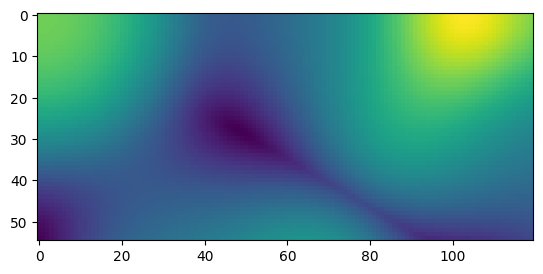

In [5]:
plt.imshow(pbedata[..., 285])

In [6]:
pbe_vb, pbe_cb = fuller.generator.bandstack(pbedata[:50,:,:], nvb=80, ncb=40, gap_id=286, cvd=103.9)

100%|██████████| 40/40 [00:01<00:00, 26.42it/s]


In [7]:
pbe_vb.shape, pbe_cb.shape

((80, 319, 339), (40, 319, 339))

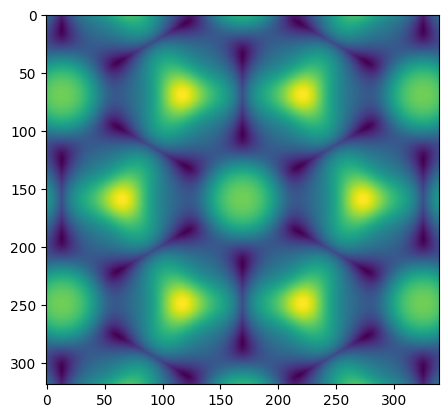

In [8]:
plt.imshow(pbe_vb[0,...])

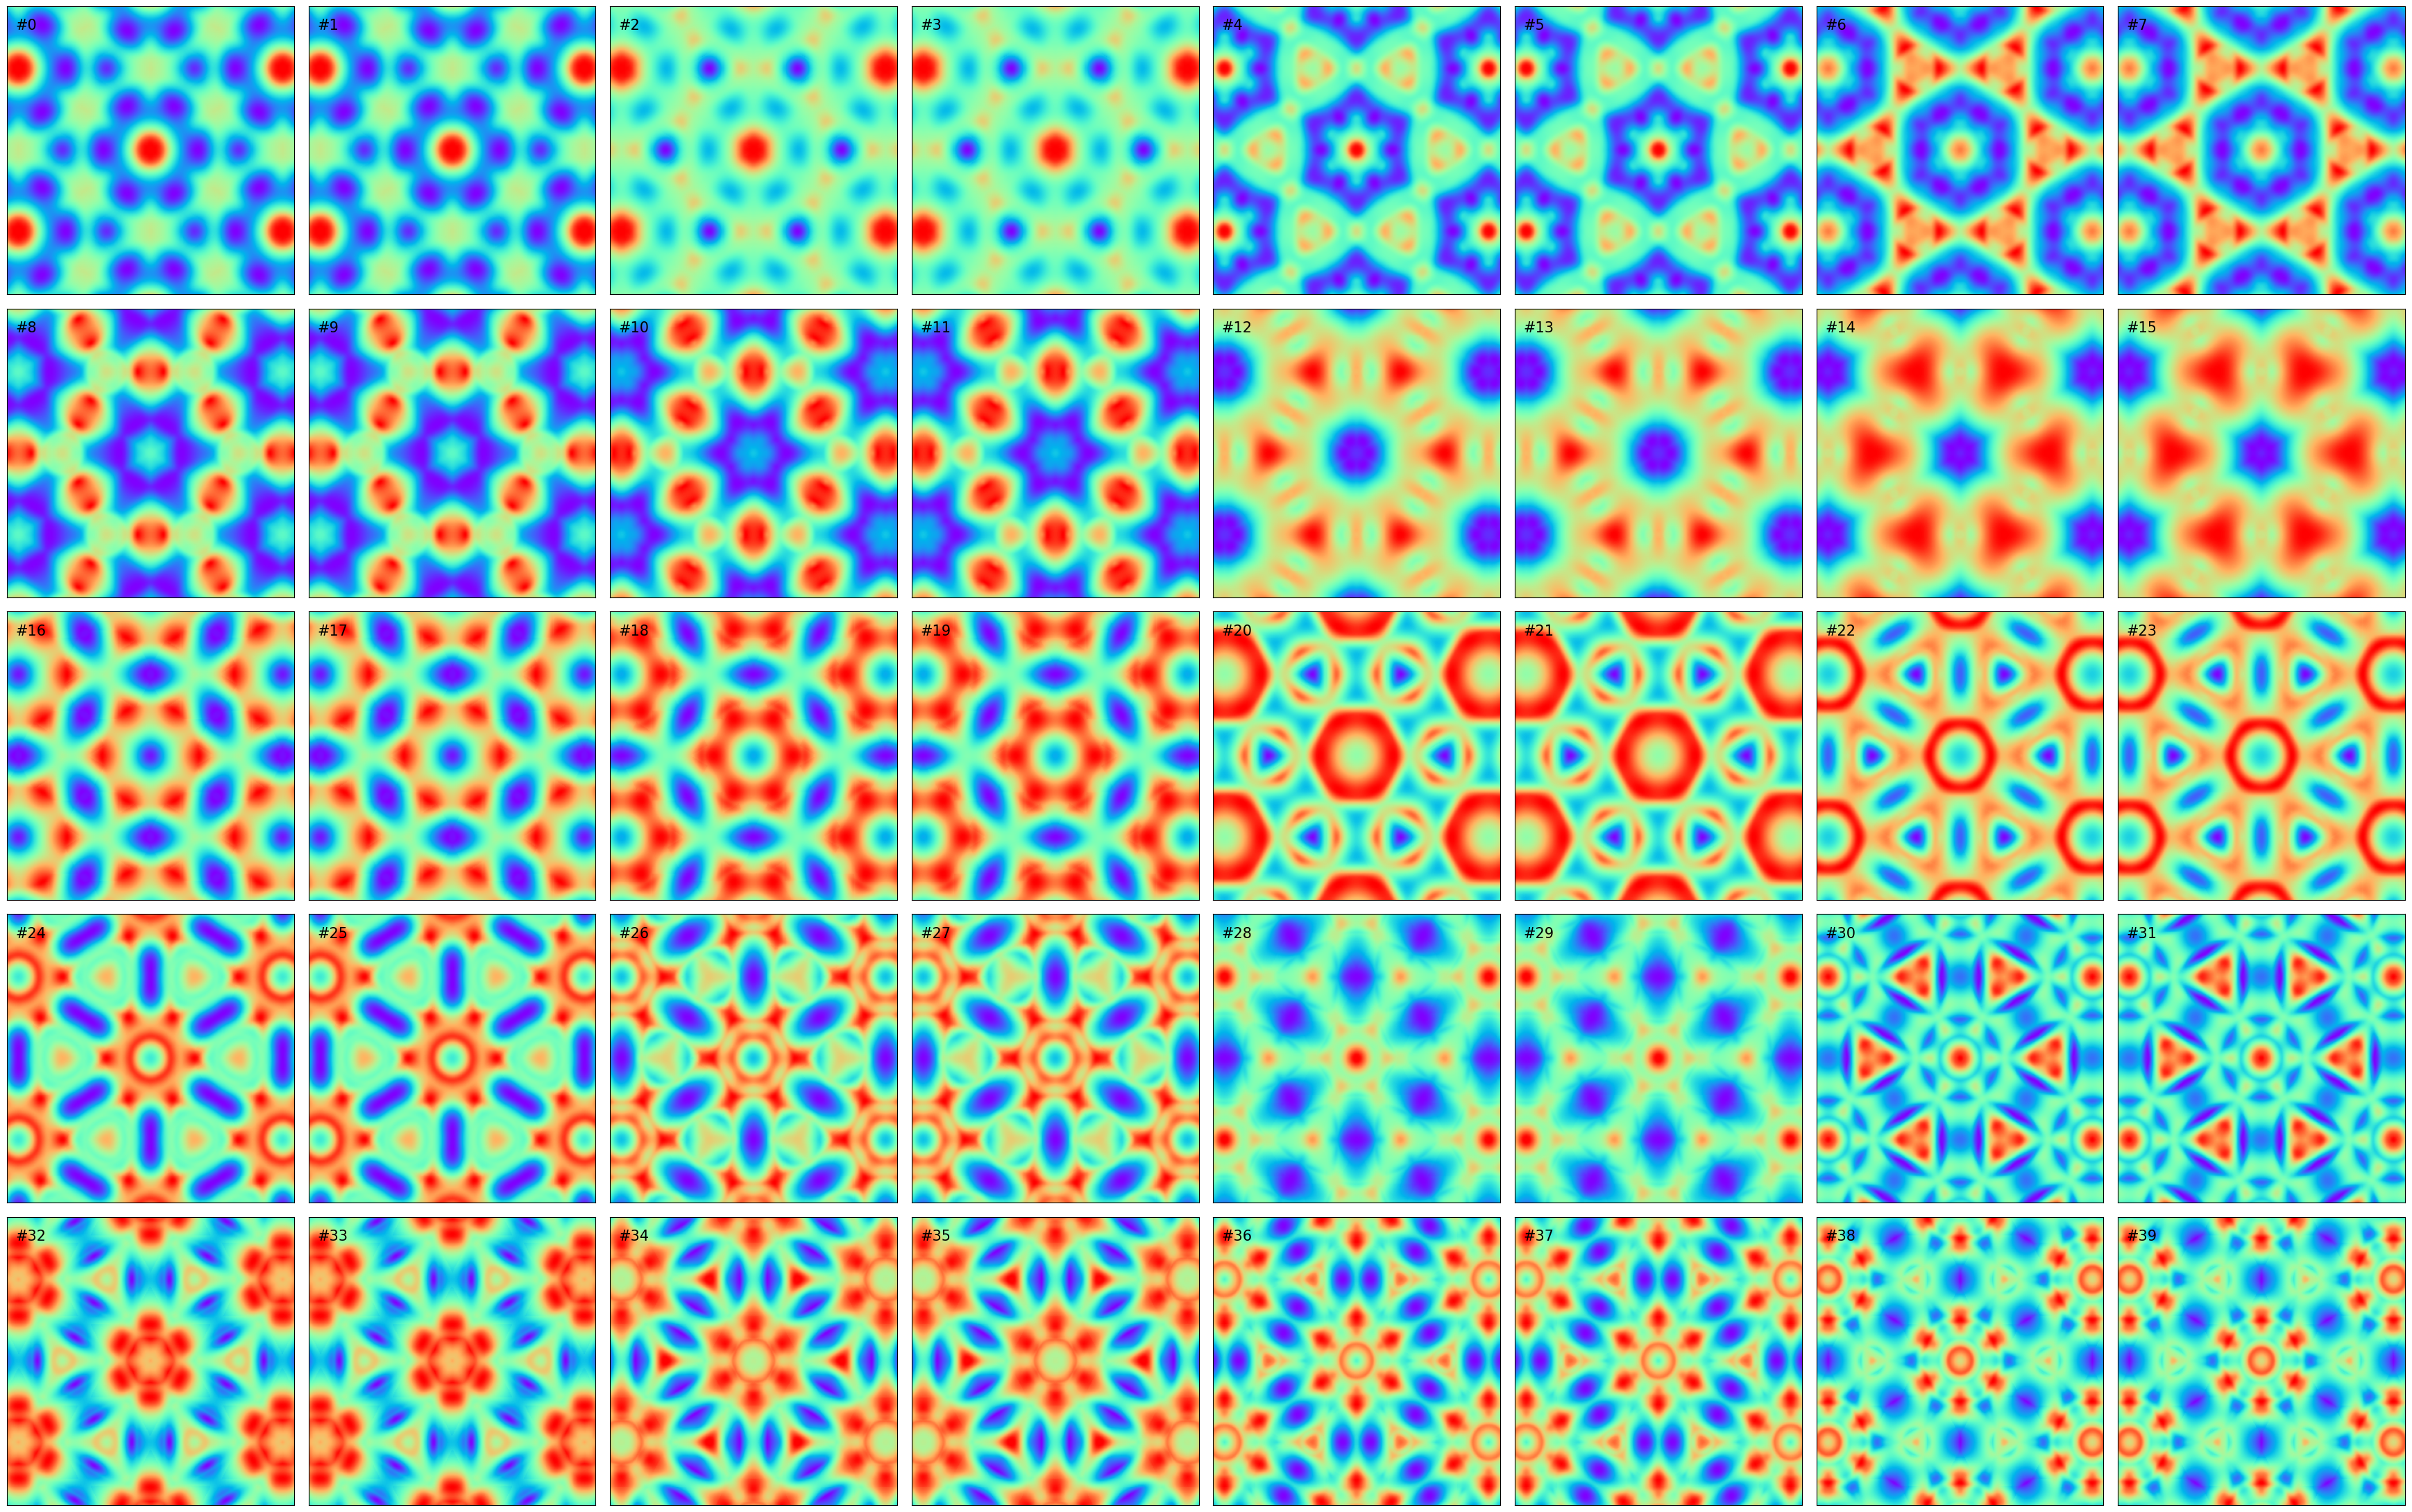

In [9]:
axs = vis.sliceview3d(pbe_cb, axis=0, ncol=8, colormap='rainbow');